In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../../../SynDiff/scenes/')
import syndiff as sd 
import delta_kernal as dk
import sys
sys.path.append('../../')
from TESS_ATLAS_Swope import *
import pandas as pd

In [2]:
np.loadtxt('2020fqv_tess.txt').shape

(1235, 2)

In [ ]:
c,o = Atlas_lcs('fqv_atlas.txt')
cc = Atlas_day(c)
oo = Atlas_day(o)

In [35]:
tess = np.load('2020fqv_single_pix.npy')
tess2 = np.load('20fqv_strip_bkg.npy')
tess2 = np.loadtxt('20fqv_difflc.txt').T
tess2 = tess2[:,np.isfinite(tess2[1,:])]

<IPython.core.display.Javascript object>


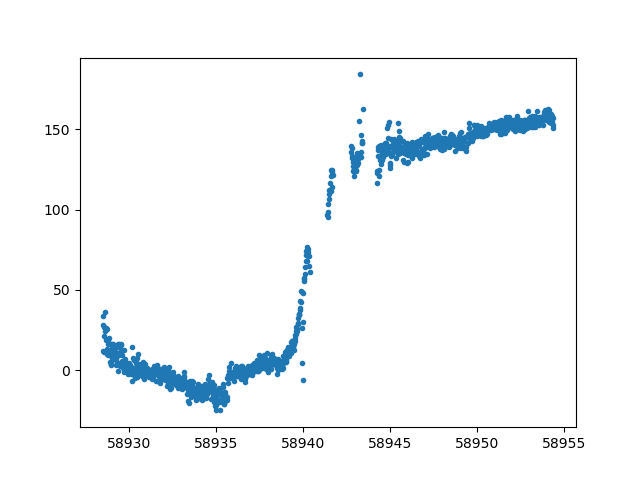

In [37]:
plt.figure()
plt.plot(tess2[0],tess2[1],'.')

In [ ]:
plt.figure()
plt.plot(tess[0,:],tess[1,:]-5.3,'.')
plt.plot(tess2[0,:],tess2[1,:],'.',alpha=.4)

In [5]:
np.savetxt('2020fqv_tess.txt',tess.T)

In [16]:
gd = pd.read_csv('2020fqv_yse.csv')

In [17]:
gd

,MJD,FLT,FLUXCAL,FLUXCALERR,MAG,MAGERR,MAGSYS,TELESCOPE,INSTRUMENT
0,58939.338,g-ZTF,2457.650,310.731,19.024,0.137,None,P48,ZTF-Cam
1,58939.373,r-ZTF,5479.236,497.690,18.153,0.099,None,P48,ZTF-Cam
2,58939.338,g-ZTF,2457.583,310.722,19.024,0.137,None,P48,ZTF-Cam
3,58939.373,r-ZTF,5478.995,497.668,18.153,0.099,None,P48,ZTF-Cam
4,58940.359,g-ZTF,22418.499,1783.391,16.623,0.086,None,P48,ZTF-Cam
...,...,...,...,...,...,...,...,...,...
116,59020.284,i,69733.265,627.914,15.391,0.010,None,Pan-STARRS1,GPC1
117,59020.286,g,7063.826,227.224,17.877,0.035,None,Pan-STARRS1,GPC1
118,59032.285,r,36327.875,354.082,16.099,0.011,None,Pan-STARRS1,GPC1
119,59032.286,z,82679.911,591.860,15.207,0.008,None,Pan-STARRS1,GPC1


In [23]:
ztf_g = gd.iloc[gd['FLT'].values=='g-ZTF']
ztf_r = gd.iloc[gd['FLT'].values=='r-ZTF']
ps1_g = gd.iloc[gd['FLT'].values=='g']
ps1_r = gd.iloc[gd['FLT'].values=='r']
ps1_i = gd.iloc[gd['FLT'].values=='i']

<IPython.core.display.Javascript object>


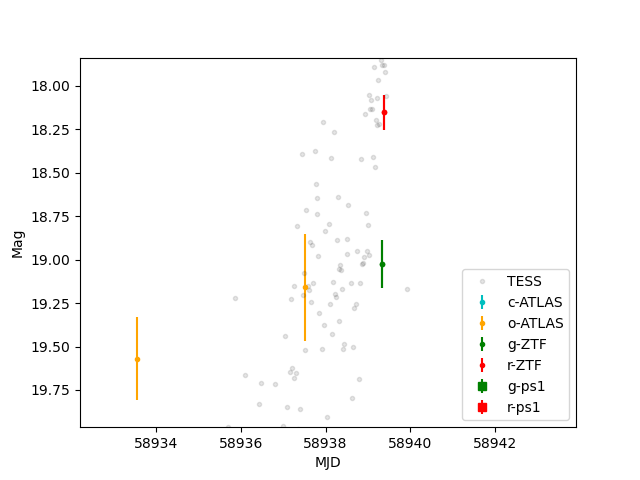

In [39]:
plt.figure()
plt.plot(tess2[0,:],-2.5*np.log10(tess2[1,:]) + 20.81,'k.',alpha=0.1,label='TESS')
#plt.errorbar(c[:,0],c[:,1],yerr=c[:,2],fmt='.')
plt.errorbar(cc[:,0],cc[:,1],yerr=cc[:,2],fmt='c.',label='c-ATLAS')
#plt.errorbar(o[:,0],o[:,1],yerr=o[:,2],fmt='.')
plt.errorbar(oo[:,0],oo[:,1],yerr=oo[:,2],fmt='.',color='orange',label='o-ATLAS')
plt.errorbar(ztf_g['MJD'].values,ztf_g['MAG'].values,yerr=ztf_g['MAGERR'].values,fmt='g.',label='g-ZTF')
plt.errorbar(ztf_r['MJD'].values,ztf_r['MAG'].values,yerr=ztf_r['MAGERR'].values,fmt='r.',label='r-ZTF')
plt.errorbar(ps1_g['MJD'].values,ps1_g['MAG'].values,yerr=ps1_g['MAGERR'].values,fmt='sg',label='g-ps1')
plt.errorbar(ps1_r['MJD'].values,ps1_r['MAG'].values,yerr=ps1_r['MAGERR'].values,fmt='sr',label='r-ps1')
#plt.errorbar(ps1_i['MJD'].values,ps1_i['MAG'].vaues,yerr=ps1_i['MAGERR'].values,fmt='sk',label='i-ps1')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF'],gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.legend()
plt.ylim(21,15)
plt.xlim(58935,58970)
plt.ylabel('Mag')
plt.xlabel('MJD')
plt.savefig('2020fqv_all_phot.pdf')

In [49]:
mag_err = (2.5 / np.log(10)) * (tess2[2] / tess2[1])
data = np.array([tess2[0],-2.5*np.log10(tess2[1,:]) + 20.81,mag_err])
names = ['time','magnitude','e_magnitude']

t = pd.DataFrame(data=data.T,columns=names)
#t['zp'] = -48.6
t['e_zp'] = 0.02
t['band'] = 'tess'
t['instrument'] = '=-tess'

ind = tess2[0] <58937
t['upperlimit'] = False
t['upperlimit'].iloc[ind] = True

/Users/rridden/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
data = np.array([ztf_g.MJD.values,ztf_g.MAG.values,ztf_g.MAGERR.values])
names = ['time','magnitude','e_magnitude']
zg = pd.DataFrame(data=data.T,columns=names)
zg['e_zp'] = 0
zg['band'] = 'g'
zg['instrument'] = '=-ztf'
zg['upperlimit'] = False


data = np.array([ztf_r.MJD.values,ztf_r.MAG.values,ztf_r.MAGERR.values])
names = ['time','magnitude','e_magnitude']
zr = pd.DataFrame(data=data.T,columns=names)
zr['e_zp'] = 0
zr['band'] = 'r'
zr['instrument'] = '=-ztf'
zr['upperlimit'] = False

data = np.array([oo[:,0],oo[:,1],oo[:,2]])
names = ['time','magnitude','e_magnitude']
ao = pd.DataFrame(data=data.T,columns=names)
ao['e_zp'] = 0
ao['band'] = 'o'
ao['instrument'] = '=-atlas'
ao['upperlimit'] = False

In [63]:
eh = t.append(zg,ignore_index=True)
eh = eh.append(zr,ignore_index=True)
eh = eh.append(ao,ignore_index=True)
eh['z'] = 0.00744
eh['zp'] = -48.6

In [66]:
eh.to_csv('20fqv_pat.csv',index=False)

In [68]:
np.savetxt('ATLAS_o_day_average.txt',oo.T)

In [18]:
spec = pd.read_csv('spec_log.txt',delimiter='\t')

In [19]:
spec

,#spec_name,MJD,instrument
0,tns_2020fqv_2020-04-01.6_Lijiang-2.4m_YFOSC.dat,58940.60,class
1,2020fqv-floyds-20200402.flm,58941.26,floyds
2,2020fqv-floyds-20200403.flm,58942.26,floyds
3,2020fqv-floyds-20200404.flm,58943.27,floyds
4,2020fqv-floyds-20200408.flm,58947.55,floyds
5,2020fqv-floyds-20200413.flm,58952.43,floyds
6,2020fqv-floyds-20200418.flm,58957.30,floyds
7,SN2020fqv-20200520-gmos.flm,58989.34,gmos
8,2020fqv-combined-20200523_ap1.flm,58992.20,kast
9,2020fqv-combined-20200527_ap1.flm,58996.32,kast


<IPython.core.display.Javascript object>


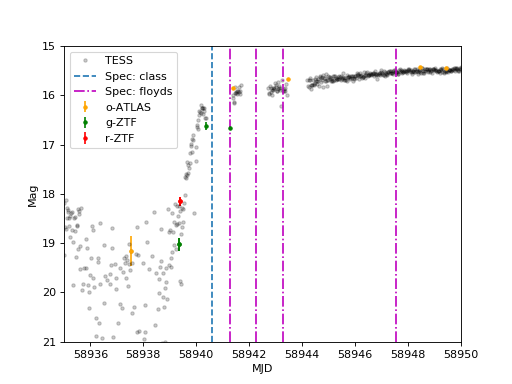

In [32]:
plt.figure()
plt.plot(tess[0,:],-2.5*np.log10(tess2[1,:]) + 19.6,'k.',alpha=0.2,label='TESS')
#plt.errorbar(c[:,0],c[:,1],yerr=c[:,2],fmt='.')
#plt.errorbar(cc[:,0],cc[:,1],yerr=cc[:,2],fmt='c.',label='c-ATLAS')
#plt.errorbar(o[:,0],o[:,1],yerr=o[:,2],fmt='.')
plt.errorbar(oo[:,0],oo[:,1],yerr=oo[:,2],fmt='.',color='orange',label='o-ATLAS')
plt.errorbar(ztf_g['MJD'].values,ztf_g['MAG'].values,yerr=ztf_g['MAGERR'].values,fmt='g.',label='g-ZTF')
plt.errorbar(ztf_r['MJD'].values,ztf_r['MAG'].values,yerr=ztf_r['MAGERR'].values,fmt='r.',label='r-ZTF')
#plt.errorbar(ps1_g['MJD'].values,ps1_g['MAG'].values,yerr=ps1_g['MAGERR'].values,fmt='sg',label='g-ps1')
#plt.errorbar(ps1_r['MJD'].values,ps1_r['MAG'].values,yerr=ps1_r['MAGERR'].values,fmt='sr',label='r-ps1')
#plt.errorbar(ps1_i['MJD'].values,ps1_i['MAG'].values,yerr=ps1_i['MAGERR'].values,fmt='sk',label='i-ps1')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF'],gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.axvline(58940.60,ls='--',label='Spec: class')
plt.axvline(58941.26,ls='-.',c='m',label='Spec: floyds')
plt.axvline(58942.26,ls='-.',c='m')
plt.axvline(58943.27,ls='-.',c='m')
plt.axvline(58947.55,ls='-.',c='m')
plt.axvline(58952.43,ls='-.',c='m')
plt.axvline(58957.30,ls='-.',c='m')



plt.legend()
plt.ylim(21,15)
plt.xlim(58935,58950)
plt.ylabel('Mag')
plt.xlabel('MJD')
plt.savefig('2020fqv_spec.pdf')

In [21]:
wut

array(['58878.501', '58956.437', '58960.296', '58980.369', '58989.259',
       '58995.359', '59005.336', '59008.286', '59032.285'], dtype=object)

In [10]:
atlas = pd.read_csv('fqv_atlas.txt')
o = atlas.iloc['o' == atlas['filter'].values]
c = atlas.iloc['c' == atlas['filter'].values]a

In [14]:
o.keys()

Index(['#expname', 'ra', 'dec', 'mag', 'dm', 'snr', 'filter', 'zp', 'mjd', 'x',
       'y', 'peakval', 'skyval', 'peakfit', 'dpeak', 'skyfit', 'flux', 'dflux',
       'chin', 'major', 'minor', 'snrdet', 'snrlimit', 'apfit', 'uJy', 'duJy'],
      dtype='object')

<IPython.core.display.Javascript object>


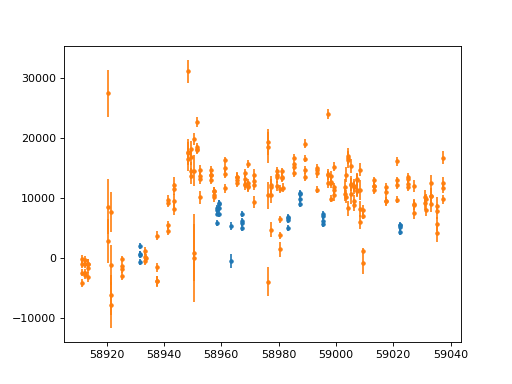

<ErrorbarContainer object of 3 artists>

In [19]:
plt.figure()
plt.errorbar(c['mjd'],c['flux'],yerr=c.dflux,fmt='.')
plt.errorbar(o['mjd'],o['flux'],yerr=o.dflux,fmt='.')

In [4]:
# SN2020fqv
ra = 189.1385827     
dec = 11.2316599

<IPython.core.display.Javascript object>


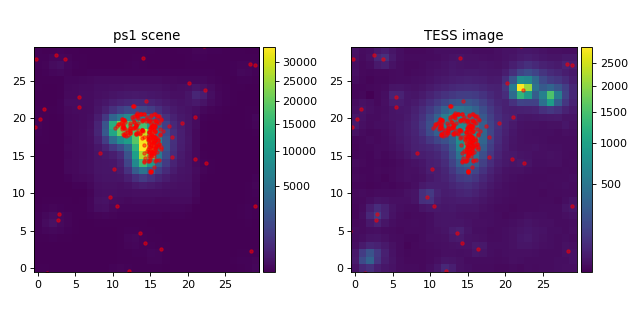

In [5]:
scene, tpf = sd.Catalog_scene(ra,dec,30,Maglim= 18, Sector=23, Catalog='ps1',Interpolate=False,Plot=True)#,Save='PS1_catalog_scene.pdf')

In [23]:
cus = np.ones_like(tpf.flux[0])
#cus[20:29,20:29] = 0
cus[12:20,12:20] = 0
bkg = sd.Scene_bkg_estimate(scene,tpf,Limit=.3,Custom_mask=cus)

flux = tpf.flux - bkg
flux[flux == 0] =np.nan

additional mask


<IPython.core.display.Javascript object>


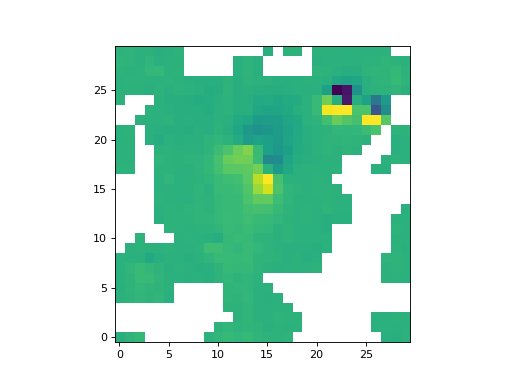

In [52]:
plt.figure()
plt.imshow(flux[800]-flux[200],origin='',vmax=100)

<IPython.core.display.Javascript object>


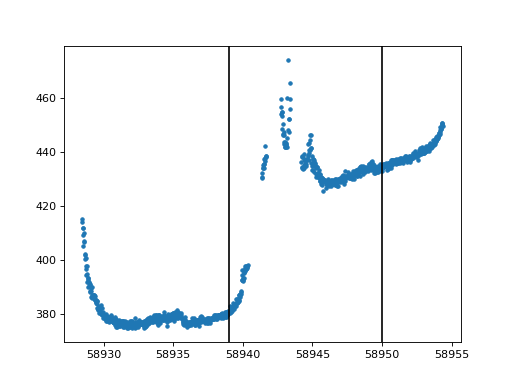

In [59]:
lc = np.nansum(flux[:,14:17,14:17],axis=(1,2))
lc = flux[:,15,14]
lc[lc==0] = np.nan
plt.figure()
plt.plot(tpf.astropy_time.mjd,lc,'.')
plt.axvline(58939,c='k')
plt.axvline(58950,c='k')

In [11]:
tpf.interact()

No pixels in `aperture_mask`, finding optimum aperture using `tpf.create_threshold_mask`.
ERROR:lightkurve.interact:No pixels in `aperture_mask`, finding optimum aperture using `tpf.create_threshold_mask`.


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [20]:
def cube_show_slider(cube, axis=2, **kwargs):
    """
    Display a 3d ndarray with a slider to move along the third dimension.

    Extra keyword arguments are passed to imshow
    """
    import matplotlib.pyplot as plt
    from matplotlib.widgets import Slider, Button, RadioButtons

    # check dim
    if not cube.ndim == 3:
        raise ValueError("cube should be an ndarray with ndim == 3")

    # generate figure
    fig = plt.figure()
    ax = plt.subplot(111)
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # select first image
    s = [slice(0, 1) if i == axis else slice(None) for i in range(3)]
    im = cube[s].squeeze()

    # display image
    l = ax.imshow(im, **kwargs)

    # define slider
    axcolor = 'lightgoldenrodyellow'
    ax = fig.add_axes([0.25, 0.1, 0.65, 0.03])

    slider = Slider(ax, 'Axis %i index' % axis, 0, cube.shape[axis] - 1,
                    valinit=0, valfmt='%i')

    def update(val):
        ind = int(slider.val)
        s = [slice(ind, ind + 1) if i == axis else slice(None)
                 for i in xrange(3)]
        im = cube[s].squeeze()
        l.set_data(im, **kwargs)
        fig.canvas.draw()

    slider.on_changed(update)

    plt.show()

<IPython.core.display.Javascript object>


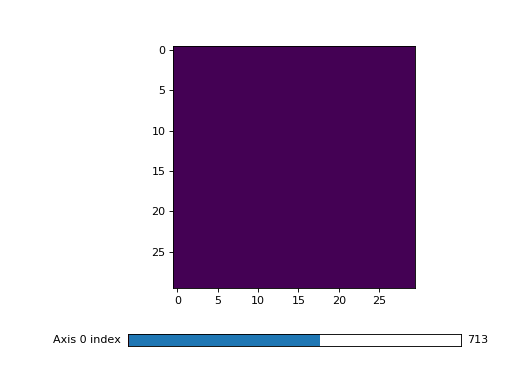

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [21]:
cube_show_slider(flux,axis=0)